In [1]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ratings = pd.read_csv("drive/MyDrive/MSBA AI Final Project/popular_ratings_dataset.csv") #user rating data
songs = pd.read_csv("drive/MyDrive/MSBA AI Final Project/popular_songs_dataset.csv") #song data

<ipython-input-4-35805d39627a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts, x='Song Count', y='Genre', palette='cool')


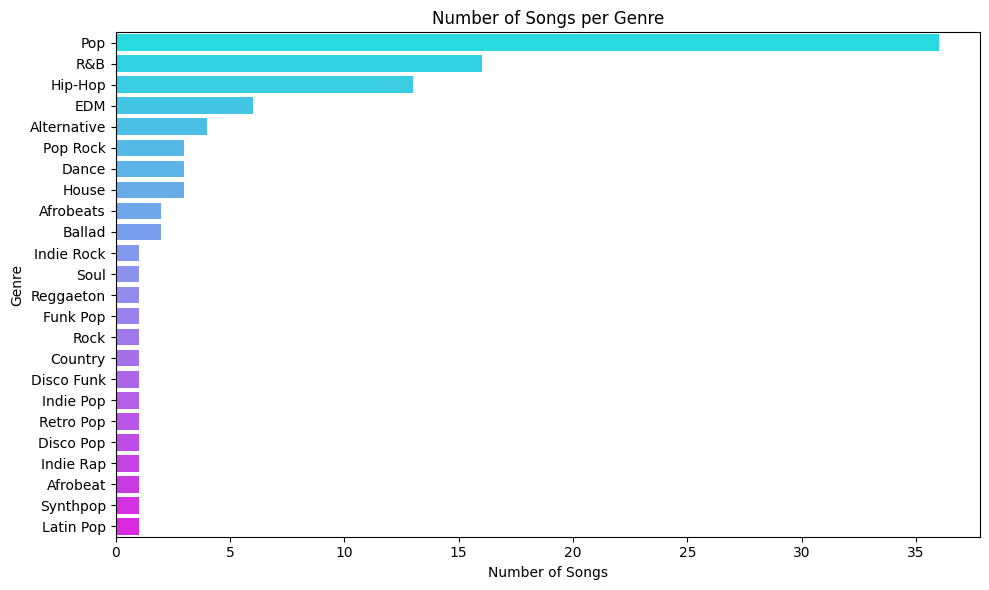

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count how many songs in each genre
genre_counts = songs['song_genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Song Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts, x='Song Count', y='Genre', palette='cool')
plt.title("Number of Songs per Genre")
plt.xlabel("Number of Songs")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()



In [5]:
unique_users = ratings['user_id'].nunique()
unique_songs = songs['song_title'].nunique()
unique_genres = songs['song_genres'].nunique()

print(f"🎧 Unique Users: {unique_users}")
print(f"🎵 Unique Songs: {unique_songs}")
print(f"🎼 Unique Genres: {unique_genres}")

🎧 Unique Users: 20
🎵 Unique Songs: 101
🎼 Unique Genres: 24


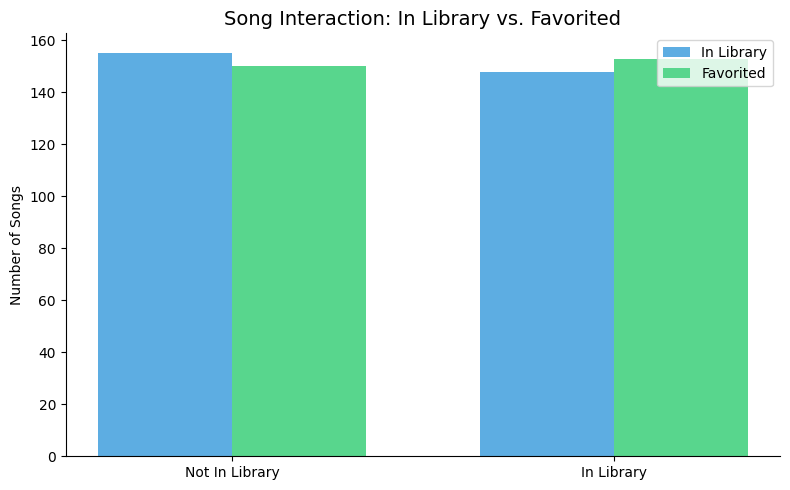

In [6]:
import matplotlib.pyplot as plt

# Real data-based counts
in_library_counts = ratings['in_library'].value_counts().to_dict()
favorited_counts = ratings['is_favorited'].value_counts().to_dict()

# Set default values to 0 in case True/False are missing
in_library_counts = {True: in_library_counts.get(True, 0), False: in_library_counts.get(False, 0)}
favorited_counts = {True: favorited_counts.get(True, 0), False: favorited_counts.get(False, 0)}

# Custom colors (cool tones)
library_color = "#5DADE2"
favorited_color = "#58D68D"

fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = [0, 1]

# Bars
ax.bar(x, [in_library_counts[False], in_library_counts[True]],
       width=bar_width, label='In Library', color=library_color)

ax.bar([i + bar_width for i in x],
       [favorited_counts[False], favorited_counts[True]],
       width=bar_width, label='Favorited', color=favorited_color)

# Labels & styling
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(['Not In Library', 'In Library'])
ax.set_ylabel("Number of Songs")
ax.set_title("Song Interaction: In Library vs. Favorited", fontsize=14)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


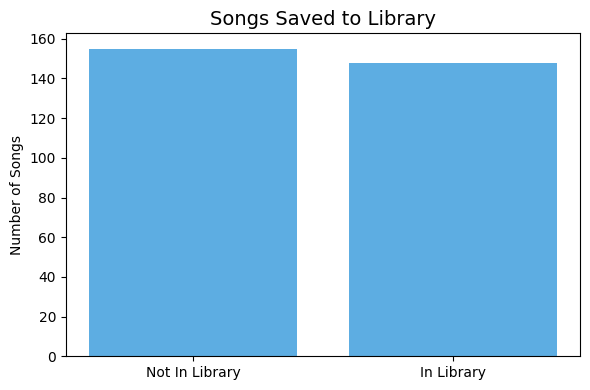

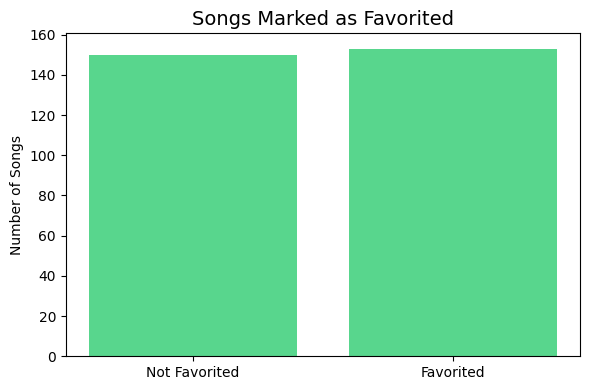

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert TRUE/FALSE to boolean (just in case they're strings)
ratings['in_library'] = ratings['in_library'].astype(str).str.upper() == 'TRUE'
ratings['is_favorited'] = ratings['is_favorited'].astype(str).str.upper() == 'TRUE'

# Count values
in_library_counts = ratings['in_library'].value_counts().sort_index()
favorited_counts = ratings['is_favorited'].value_counts().sort_index()

# Map True/False to labels
labels = ['Not In Library', 'In Library']
labels2 = ['Not Favorited', 'Favorited']

# --- Bar Chart 1: In Library ---
plt.figure(figsize=(6, 4))
plt.bar(labels, [in_library_counts.get(False, 0), in_library_counts.get(True, 0)], color="#5DADE2")
plt.title("Songs Saved to Library", fontsize=14)
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()

# --- Bar Chart 2: Favorited ---
plt.figure(figsize=(6, 4))
plt.bar(labels2, [favorited_counts.get(False, 0), favorited_counts.get(True, 0)], color="#58D68D")
plt.title("Songs Marked as Favorited", fontsize=14)
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()
